In [2]:
import json
import requests
import datetime 


# 1.1 Extract Information From Transaction

In [3]:

# fetching data from the whatsonchain API
my_answer = requests.get("https://api.whatsonchain.com/v1/bsv/main/block/height/758992")
answer_json = json.loads(my_answer.text)

# obtaining the information from the block 
print("txcount: " + str(answer_json["txcount"]))
print("time: " + str(answer_json["time"]))
print("totalFees: " + str(answer_json["totalFees"]))
print("confirmations: " + str(answer_json["confirmations"]))
print("miner: " + str(answer_json["miner"]))

# converting the unix timestamp into human read- able format to the nearest second.
timestamp = datetime.datetime.fromtimestamp(answer_json["time"])
print ("The block was mined on: " + str(timestamp.strftime("%Y-%m-%d %H:%M:%S")))



txcount: 277448
time: 1664282019
totalFees: 0.33298939999999977
confirmations: 15822
miner: qdlnk
The block was mined on: 2022-09-27 13:33:39


# Explaining each of the parts of the block in words.

txcount : This is the transaction counter and it shows the number of transactions contained by the block which is 277,448  

time : This shows the timestamp of the block

totalFees : this is the transaction costs

confirmation: the number of block confirmations that have happened which is 14,130

miner : this is the validator of the information within a bloc block 

# 2.1 Time Series Data

In [4]:

import pandas as pd
from fredapi import Fred
import numpy as np
fred = Fred(api_key="6f278b4aa22e45ccdd5f1abc83e61964")

import yfinance as yf
df_yahoo = yf.download('AAPL',
start='2014-12-01',
end='2022-11-01')

# series of the price of Coinbase Bitcoin
CBBTCUSD= fred.get_series("CBBTCUSD", title= "Coinbase Bitcoin", observation_start='2014-12-01', 
                          observation_end='2022-11-01')


# series of the price of Gold 
# ID7108= fred.get_series("ID7108", title= "Gold", observation_start='2014-12-01', observation_end='2022-11-01')


# series of the price of S&P 500 
SP500 =fred.get_series("SP500",title= "S&P 500", observation_start='2014-12-01', 
                          observation_end='2022-11-01')


[*********************100%***********************]  1 of 1 completed


# 2.2 Data Transformations

In [6]:

# three data series  placed together into a Pandas DataFrame with compatible time periods
df = {}
df['CBBTCUSD'] = fred.get_series('CBBTCUSD', observation_start='2014-12-01', observation_end='2022-10-31')
df['APPLE'] = df_yahoo["Close"]
df['SP500'] = fred.get_series('SP500', observation_start='2014-12-01', observation_end='2022-10-31')
df = pd.DataFrame(df)
df

# Transforming observations into returns 
new_df = np.log(df) - np.log(df.shift(1))
new_df.fillna(0)

,CBBTCUSD,APPLE,SP500
2014-12-01,0.000000,0.000000,0.000000
2014-12-02,0.021391,-0.003831,0.006364
2014-12-03,0.000000,0.011277,0.003758
2014-12-04,-0.002384,-0.003803,-0.001162
2014-12-05,0.000000,-0.004252,0.001664
...,...,...,...
2022-10-27,-0.023066,-0.030939,-0.006101
2022-10-28,0.015012,0.072834,0.024328
2022-10-29,0.011451,0.000000,0.000000
2022-10-30,-0.009465,0.000000,0.000000


# 2.3 Data Data Analysis

Text(0.5, 1.0, 'Expected Return versus Risk')

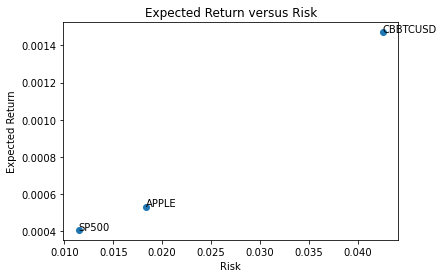

In [20]:

import matplotlib.pyplot as plt 
import numpy as np

# Make the plot
x = new_df.std().tolist()
y = new_df.mean().tolist()
symbols = new_df.columns
# Scatterplot and annotation
plt.scatter(x, y)
for index, symbol in enumerate(symbols):
    plt.annotate(symbol, (x[index], y[index]))
#plt.plot(np.unique(x),
        # np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),
         #color='black')
# Title and axis
plt.xlabel('Risk')
plt.ylabel('Expected Return')
plt.title('Expected Return versus Risk')


The bitcoin stock (CBBTCUSD), is the most volatile, so according to CAPM theory, it has the higest return and also 
the highest risk

The APPLE stock is relatively safer so the risk is lower and the return is also lower because of the risk return tradeoff

Finally, the market index, SP500 has the lowest risk of the three and also the lowest return 


In [32]:
# Add a constant variable
new_df['const'] = 1

reg1 = sma.OLS(endog=new_df["CBBTCUSD"], exog=new_df[['const',"SP500"]], missing='drop')
result= reg1.fit()
print(result.summary())                                               
                                             

                            OLS Regression Results                            
Dep. Variable:               CBBTCUSD   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     62.53
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           4.95e-15
Time:                        15:26:40   Log-Likelihood:                 2538.4
No. Observations:                1544   AIC:                            -5073.
Df Residuals:                    1542   BIC:                            -5062.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.001      0.566      0.5

Alpha is 0.0007 and Beta is 0.8233 and this is the risk return trade off.

Hight beta means high risk, high return and a low beta means  low risk, low return. 

Alpha is excess return over and above what you would expect the asset to have. All assets should have  zero in theory. Since it's positive, people get a higher return than they should have gotten given the risk return relationships in the market 


You're going to find a time series here for a particular overall index, and you're just going to do a linear regression of that on that.


# 3.1 High Level Description of FinTech Firm 


Sarunas’ Fin Tech firm provides loans for people based on a Machine Learning algorithm that predicts the probability a person will default on a loan and deny or approve the loan based on that.
The firm uses a dockerized application consisting of 4 main components to provide this service. 
The first component is Jupyter. This is where the machine learning model predicts a person’s probability of defaulting a loan. 
The Streamlit UI let’s the user interact with the application, to register and apply for loans and receive feedback on their loan application. 
When a user registers, their data is stored in the Postgres Database and it also stores requests and responses.
FastAPI is what is used to host the application to allow the user receive the results of the machine learning model.

# 3.2 Written description of Python Code

In [34]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import numpy as np

In [35]:
features = ['loan_amnt', 'annual_inc', 'term', 'emp_length']

This line creates a list of columns from the dataset to transform the data

In [ ]:
a = pd.read_csv('accepted_2007_to_2018Q4.csv', usecols=features+['loan_status'])

The dataset is read with pandas and only the specified columns are used to create a pandas dataframe

In [ ]:
full_set = a.query("loan_status in ('Fully Paid', 'Charged Off')").copy()

A new dataframe is created by deleting the rows in 'loan_status' that are not either 'Fully Paid' or 'Charged Off'

In [ ]:
full_set = full_set.dropna(subset=['emp_length'])

All rows in the 'emp_length' column that have missing values are removed

In [ ]:
full_set['loan_status'] = full_set['loan_status'].replace(
    {
        'Fully Paid': 1,
        'Charged Off': 0
    }
)

full_set['term'] = full_set['term'].replace(
    {
        ' 36 months': 36,
        ' 60 months': 60
    }
)

This line replaces 'Fully Paid' with 1 and 'Charged Off' with 0 in the 'loan_status' column. It also replaces '36 months' with 36 and '60 months' with 60 in the 'term' column.

In [ ]:
full_set['emp_length'] = full_set['emp_length'].map(lambda x: x.split(' ')[0])
full_set['emp_length'] = full_set['emp_length'].map(lambda x: str(x).replace('+', '').replace('<', '0'))

In [ ]:
model_features = list(full_set.columns)
model_features.remove('loan_status')

In [ ]:
full_set.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    full_set[model_features],
    full_set['loan_status'],
    random_state=42
)

In [ ]:
model = LogisticRegression()
scaler = MinMaxScaler()

In [ ]:
pipeline = Pipeline([('scaler', scaler), ('model', model)])

In [ ]:
pipeline.fit(X_train, y_train)

In [ ]:
test_probas = pipeline.predict_proba(X_test)[:,1]

fpr, tpr, tresholds = roc_curve(y_test, test_probas)
plt.plot(fpr, tpr, color='red')
plt.title('ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.grid()

print('ROC-AUC-score: ', roc_auc_score(y_test, test_probas))

In [ ]:
def _compute_accuracy_for_thresholds(data: pd.core.frame.DataFrame):
    """
    Compute Classifier's Accuracy for various thresholds
    """
    
    thresholds = np.linspace(0, 1, 100)
    
    accuracies = []
    
    for threshold in thresholds:
        preds = data['preds'].map(lambda x: 1 if x > threshold else 0)
        accuracy_ = accuracy_score(data['labels'].values, preds)
        accuracies.append(accuracy_)
    
    return accuracies, thresholds

In [ ]:
X_test['preds'] = test_probas
X_test['labels'] = y_test

In [ ]:
accuracies, thresholds = _compute_accuracy_for_thresholds(X_test)

In [ ]:
plt.plot(thresholds.reshape(-1, 1), accuracies, label='Thresholds')
plt.axhline(
    (X_test['labels'].sum()) / len(X_test), color='red', label='No Model Accuracy')
plt.grid()
plt.title('Accuracy for various Thresholds')
plt.xlabel('Threshold')
plt.ylabel('Accuracy of Predictions')
plt.legend()
plt.show()

In [ ]:
accuracy_score(X_test['labels'].values, list(map(lambda x: 1 if x > 0.7 else 0, X_test['preds'])))

In [ ]:
with open('app/model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [ ]:
model = pickle.load(
    open('app/model.pkl', 'rb')
)

# 3.3 Machine Learning Model

Predicting if tomorrows price of apple stock would increase based on todays price

In [52]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

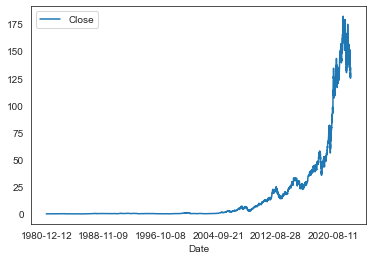

In [53]:
# reading in the csv file for apple
aapl = pd.read_csv('AAPL.csv', index_col = 'Date')
aapl.head()
aapl.plot.line(y="Close", use_index=True)

In [54]:
dataset = aapl[['Close']]
dataset = dataset.rename(columns = {'Close':'Test_Close'})

# assigning a score of 0 when the price went down and 1 when prices goes up 
dataset["Score"] = aapl.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])["Close"]

# shifting the prices by one day 
aapl_prev = aapl.copy()
aapl_prev = aapl_prev.shift(1)

data_columns = ["Close", "Volume", "Open", "High", "Low"]
dataset = dataset.join(aapl_prev[data_columns]).iloc[1:]
dataset = dataset.iloc[5000:]

In [55]:
# classification algorithm using the last 100 items to train and testing it on the rest of the data
model = RandomForestClassifier(n_estimators=1000, min_samples_split=50, random_state=1)

train = dataset.iloc[:-100]
test = dataset.iloc[-100:]

model.fit(train[data_columns], train["Score"])

RandomForestClassifier(min_samples_split=50, n_estimators=1000, random_state=1)

In [56]:
# making predictions across the entire dataset and train the model every 150 rows starting with 300 as initial set
def backtest(dataset, model, columns, start=300, step=150):
    predictions = []
    for i in range(start, dataset.shape[0], step):
        train = dataset.iloc[0:i].copy()
        test = dataset.iloc[i:(i+step)].copy()

        model.fit(train[data_columns], train["Score"])

# if model predicts a 60% chance that price would go up then it would issue 1 and 0 otherwise
        predicts = model.predict_proba(test[columns])[:,1]
        predicts = pd.Series(predicts, index=test.index)
        predicts[predicts > .6] = 1
        predicts[predicts<=.6] = 0

        combined = pd.concat({"Score": test["Score"],"Predictions": predicts}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [57]:
predictions = backtest(dataset, model, data_columns)

In [58]:
# gives model accuracy 

precision_score(predictions["Score"], predictions["Predictions"])

0.5272331154684096